# Programme for International Student Assessment (PISA) 2018 School Survey: Visual Exploration 
### Lyubomira Derelieva
### February 2023


### Table of Contents

* [1. Introduction](#1.-Introduction)
   
* [2. Research Questions](#2.-Research-Questions)

* [3. Preliminary Wrangling](#3.-Preliminary-Wrangling)

* [4. Visual Exploration](#4.-Visual-Exploration)
    * [4.1. Univariate Exploration](#4.1.-Univariate-Exploration)
    * [4.2. Bivariate Exploration](#4.2.-Bivariate-Exploration)
    * [4.3. Multivariate Exploration](#4.3.-Multivariate-Exploration)
    
* [5. Conclusions](#7.-Conclusions)




## 1. Introduction

>The Programme for International Student Assessment (PISA) is a series of educational tests and surveys developed and managed by the Organisation for Economic Co-operation and Development (OECD). PISA surveys students at age 15-16 as they approach the end of compulsory education to assess:
>- how well students have learned the school curriculum, and 
>- how well prepared they are for life beyond school.

>PISA's aim is to gather comparable data that participating countries (that may or may not be OECD members) |can use to improve their education policies and outcomes.

>The latest PISA assessment took place in 2018 and consisted of 10 questionnaires completed by different education systems stakeholders (students, teachers, parents, and school principals). This project looks at:
>- the answers to the questionnaire filled in by school principals, called the School Survey -  available [here](https://www.oecd.org/pisa/data/2018database/CY7_201710_QST_MS_SCQ_NoNotes_final.pdf), and
>- the 2018 average PISA scores for participating countries.

> The dataset is available on Kaggle here in a csv format [here](https://www.kaggle.com/datasets/dilaraahan/pisa-2018-school-questionnaire), and on the PISA website in SAS and SPSS formats [here](https://www.oecd.org/pisa/data/2018database/). 



## 2. Research Questions

> This project will explore the dataset visually looking at univariate, bivariate and multivariate descriptive statistics in order to answer the questions:
>- **Which education system/school characteristics had the strongest correlation with average 2018 PISA score?**
>- **What were the effects of OECD membership on PISA performance?**

>  The project's main variable of interest is the 2018 average PISA score per country as an indicator of student learning outcomes.


## 3. Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

%matplotlib inline

In [2]:
# load schools dataset and visually assess it

df_schools = pd.read_csv("CY07_MSU_SCH_QQQ.csv")
df_schools


,Unnamed: 0,CNTRYID,CNT,CNTSCHID,CYC,NatCen,Region,STRATUM,SUBNATIO,OECD,...,EDUSHORT,STAFFSHORT,STUBEHA,TEACHBEHA,SCMCEG,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM,SENWT,VER_DAT,BOOKID
0,1,8,ALB,800002,07MS,800,800,ALB0109,80000,0,...,1.2478,-1.4551,-1.1797,-2.0409,-1.0391,7.98891,115.10603,24.81933,09MAY19:11:20:57,NaN
1,2,8,ALB,800003,07MS,800,800,ALB0109,80000,0,...,0.6221,-1.4551,2.1196,2.5150,-1.0542,6.50492,26.01970,20.20900,09MAY19:11:20:57,NaN
2,3,8,ALB,800004,07MS,800,800,ALB0211,80000,0,...,0.4591,-1.4551,-0.6199,-0.4415,0.9042,6.64198,99.62974,20.63480,09MAY19:11:20:57,NaN
3,4,8,ALB,800005,07MS,800,800,ALB0107,80000,0,...,1.3065,1.2432,-0.2682,-0.0452,-1.5648,5.93762,66.50133,18.44654,09MAY19:11:20:57,NaN
4,5,8,ALB,800006,07MS,800,800,ALB0105,80000,0,...,-0.2376,-1.4551,-1.3196,-2.0409,0.9042,14.61508,277.68645,45.40500,09MAY19:11:20:57,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21898,21899,983,QRT,98300802,07MS,64300,64387,QRT8787,9830000,0,...,1.0245,0.1964,-0.8655,-0.9138,0.3009,8.35477,180.42418,32.18244,01MAY19:20:24:14,NaN
21899,21900,983,QRT,98300803,07MS,64300,64387,QRT8787,9830000,0,...,0.6606,0.6736,3.4411,3.7879,-4.0518,8.35477,42.30265,32.18244,01MAY19:20:24:14,NaN
21900,21901,983,QRT,98300804,07MS,64300,64387,QRT8787,9830000,0,...,-0.2376,-1.4551,1.4176,1.6385,0.9042,8.35477,96.42515,32.18244,01MAY19:20:24:14,NaN
21901,21902,983,QRT,98300805,07MS,64300,64387,QRT8787,9830000,0,...,0.1111,-0.0019,2.6095,1.5152,-1.0542,8.35477,31.72699,32.18244,01MAY19:20:24:14,NaN


In [3]:
# check data structure by country

df_schools.CNT.value_counts()


ESP    1089
CAN     821
AUS     763
ARE     755
KAZ     616
       ... 
QMR      61
BRN      55
MLT      50
MAC      45
LUX      44
Name: CNT, Length: 80, dtype: int64

The dataset includes all school replies per country. This means that we will have to find the average value per country per variable to map it against the overall score.


In [4]:
# load scores dataset and visually assess it

df_scores = pd.read_csv("scores_data.csv")
df_scores

,country,cca3,avg score
0,Dominican Republic,DOM,334.3
1,Philippines,PHL,350.0
2,Kosovo,KSV,361.3
3,Panama,PAN,365.0
4,Morocco,MAR,368.0
...,...,...,...
71,Estonia,EST,525.3
72,Hong Kong,HKG,530.7
73,Macao,MAC,542.3
74,Singapore,SGP,556.3


In [5]:
# find datasets' structure

print(df_schools.info())
print(df_scores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21903 entries, 0 to 21902
Columns: 198 entries, Unnamed: 0 to BOOKID
dtypes: float64(184), int64(9), object(5)
memory usage: 33.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    76 non-null     object 
 1   cca3       76 non-null     object 
 2   avg score  76 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.9+ KB
None


The school survey dataset includes 198 columns and 21,903 rows. The scores dataset includes 3 columns and 76 rows for the countries' average scores in mathematics, science and reading.


To understand the column names, we need to look at the codebook on [PISA's website](https://www.oecd.org/pisa/data/2018database/). Then we will select the main variables (columns) of interest.


To narrow down the project's scope, I have chosen 13 out of the 198 variables in the school survey dataset to try to answer the question. The variables we'll use in the project (including the average PISA score) can be grouped in two categories: 

1) school characteristics:
- OECD membership,
- rural vs. urban school location, 
- public vs. private school, 
- main funding source (government vs. student fees),
- number of students whose mother tongue is different from the official language of instruction,
- number of students with special needs, 
- number of students from socioeconomically disadvantaged homes.

2) indicators of education quality:
- average PISA score* (in the scores dataset),
- school provision of study help, 
- student-teacher ratio, 
- class size,
- truancy rate,
- availability of computers. 



In [6]:
# as it will be more efficient to select the columns of interest when loading the schools dataset than to delete 
# all the columns we won't use in the analysis, we load the schools csv file again doing that

df_schools_short = pd.read_csv('CY07_MSU_SCH_QQQ.csv', usecols=['CNT', 'OECD', 'SC001Q01TA', 'SC013Q01TA', 'SC016Q01TA', 'SC016Q02TA', 'SC061Q01TA', 'SC048Q01NA', 'SC048Q02NA', 'SC048Q03NA', 'SC052Q01NA', 'SC052Q02NA', 'SC052Q03HA', 'STRATIO', 'RATCMP1', 'CLSIZE'])
df_schools_short

,CNT,OECD,SC001Q01TA,SC013Q01TA,SC016Q01TA,SC016Q02TA,SC061Q01TA,SC048Q01NA,SC048Q02NA,SC048Q03NA,SC052Q01NA,SC052Q02NA,SC052Q03HA,STRATIO,RATCMP1,CLSIZE
0,ALB,0,1.0,1.0,95.0,0.0,2.0,0.0,0.0,40.0,2.0,2.0,2.0,NaN,NaN,18.0
1,ALB,0,1.0,1.0,NaN,NaN,4.0,NaN,5.0,70.0,2.0,2.0,2.0,NaN,NaN,13.0
2,ALB,0,1.0,1.0,100.0,0.0,2.0,NaN,2.0,85.0,1.0,1.0,1.0,9.7619,0.0000,18.0
3,ALB,0,2.0,1.0,100.0,0.0,2.0,NaN,2.0,25.0,2.0,1.0,1.0,NaN,NaN,23.0
4,ALB,0,2.0,1.0,100.0,NaN,1.0,0.0,1.0,12.0,2.0,2.0,1.0,18.0000,0.0256,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21898,QRT,0,2.0,1.0,98.0,0.0,2.0,3.0,0.0,1.0,1.0,1.0,1.0,6.3478,NaN,18.0
21899,QRT,0,1.0,1.0,100.0,0.0,4.0,0.0,0.0,0.0,2.0,1.0,1.0,1.6923,NaN,13.0
21900,QRT,0,1.0,1.0,100.0,0.0,3.0,0.0,0.0,2.0,2.0,1.0,1.0,5.1034,NaN,13.0
21901,QRT,0,1.0,1.0,100.0,0.0,4.0,20.0,0.0,40.0,1.0,1.0,1.0,4.5833,NaN,13.0


In [7]:
# make a copy of the datasets before proceeding with cleaning the data 

df_schools_short_copy = df_schools_short.copy()
df_scores_copy = df_scores.copy()
print(df_schools_short_copy)
print(df_scores_copy)


       CNT  OECD  SC001Q01TA  SC013Q01TA  SC016Q01TA  SC016Q02TA  SC061Q01TA  \
0      ALB     0         1.0         1.0        95.0         0.0         2.0   
1      ALB     0         1.0         1.0         NaN         NaN         4.0   
2      ALB     0         1.0         1.0       100.0         0.0         2.0   
3      ALB     0         2.0         1.0       100.0         0.0         2.0   
4      ALB     0         2.0         1.0       100.0         NaN         1.0   
...    ...   ...         ...         ...         ...         ...         ...   
21898  QRT     0         2.0         1.0        98.0         0.0         2.0   
21899  QRT     0         1.0         1.0       100.0         0.0         4.0   
21900  QRT     0         1.0         1.0       100.0         0.0         3.0   
21901  QRT     0         1.0         1.0       100.0         0.0         4.0   
21902  QRT     0         4.0         1.0       100.0         0.0         3.0   

       SC048Q01NA  SC048Q02NA  SC048Q03

Next, we'll prepare the two datasets for merging.

In [8]:
# check if the country names match 

set(df_schools_short_copy['CNT'].unique()) == set(df_scores_copy['cca3'].unique())


False

In [9]:
# find the unique values that don't match

unique_values_schools = set(df_schools_short_copy['CNT'].unique())
unique_values_scores = set(df_scores_copy['cca3'].unique())

values_only_in_schools = unique_values_schools - unique_values_scores
values_only_in_scores = unique_values_scores - unique_values_schools

print("Unique values only in schools:", values_only_in_schools)
print("Unique values only in scores:", values_only_in_scores)


Unique values only in schools: {'QMR', 'VNM', 'ESP', 'TAP', 'QRT'}
Unique values only in scores: {'QCY'}


In [10]:
# find the index of Cyprus (QCY), so we can drop the row since we don't have corresponding data in the school 
# survey dataset to analyze 

QCY_index = df_scores_copy.loc[df_scores_copy['cca3'] == 'QCY'].index[0]
QCY_index


32

In [11]:
# drop QCY from the scores dataset 

df_scores_copy_v2 = df_scores_copy.drop(32)


In [12]:
# check result

unique_values_schools = set(df_schools_short_copy['CNT'].unique())
unique_values_scores = set(df_scores_copy_v2['cca3'].unique())

values_only_in_scores = unique_values_scores - unique_values_schools

print("Unique values only in scores:", values_only_in_scores)


Unique values only in scores: set()


In [13]:
# rename the columns in the schools dataframe to be able to understand it without referring to the PISA codebook

df_schools_short_copy.rename(columns={'CNT':'country_abbr','SC001Q01TA':'urban_rural', 'SC013Q01TA':'public_private', 'SC016Q01TA':'gov_fund', 'SC016Q02TA':'fees_fund', 'SC061Q01TA':'truancy', 'SC048Q01NA':'heritlang_diff', 'SC048Q02NA':'special_needs', 'SC048Q03NA':'disadv_home', 'SC052Q01NA':'help_room', 'SC052Q02NA':'help_staff', 'SC052Q03HA':'help_peer', 'STRATIO':'st_ratio','SCHSIZE':'school_size','RATCMP1':'comp_student', 'CLSIZE':'class_size'}, inplace=True)
df_schools_short_copy

,country_abbr,OECD,urban_rural,public_private,gov_fund,fees_fund,truancy,heritlang_diff,special_needs,disadv_home,help_room,help_staff,help_peer,st_ratio,comp_student,class_size
0,ALB,0,1.0,1.0,95.0,0.0,2.0,0.0,0.0,40.0,2.0,2.0,2.0,NaN,NaN,18.0
1,ALB,0,1.0,1.0,NaN,NaN,4.0,NaN,5.0,70.0,2.0,2.0,2.0,NaN,NaN,13.0
2,ALB,0,1.0,1.0,100.0,0.0,2.0,NaN,2.0,85.0,1.0,1.0,1.0,9.7619,0.0000,18.0
3,ALB,0,2.0,1.0,100.0,0.0,2.0,NaN,2.0,25.0,2.0,1.0,1.0,NaN,NaN,23.0
4,ALB,0,2.0,1.0,100.0,NaN,1.0,0.0,1.0,12.0,2.0,2.0,1.0,18.0000,0.0256,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21898,QRT,0,2.0,1.0,98.0,0.0,2.0,3.0,0.0,1.0,1.0,1.0,1.0,6.3478,NaN,18.0
21899,QRT,0,1.0,1.0,100.0,0.0,4.0,0.0,0.0,0.0,2.0,1.0,1.0,1.6923,NaN,13.0
21900,QRT,0,1.0,1.0,100.0,0.0,3.0,0.0,0.0,2.0,2.0,1.0,1.0,5.1034,NaN,13.0
21901,QRT,0,1.0,1.0,100.0,0.0,4.0,20.0,0.0,40.0,1.0,1.0,1.0,4.5833,NaN,13.0


In [14]:
# rename the country column in the scores dataset to allow merging it with the schools dataframe and format 
# 'avg score' to 'avg_score'

df_scores_copy_v2.rename(columns={'cca3':'country_abbr', 'avg score':'avg_score'}, inplace=True)
df_scores_copy_v2


,country,country_abbr,avg_score
0,Dominican Republic,DOM,334.3
1,Philippines,PHL,350.0
2,Kosovo,KSV,361.3
3,Panama,PAN,365.0
4,Morocco,MAR,368.0
...,...,...,...
71,Estonia,EST,525.3
72,Hong Kong,HKG,530.7
73,Macao,MAC,542.3
74,Singapore,SGP,556.3


In [15]:
# merge the datasets on country name only keeping the countries for which we have a PISA score (left join)

df_merged = df_scores_copy_v2.merge(df_schools_short_copy, how = 'left', on ='country_abbr')
df_merged


,country,country_abbr,avg_score,OECD,urban_rural,public_private,gov_fund,fees_fund,truancy,heritlang_diff,special_needs,disadv_home,help_room,help_staff,help_peer,st_ratio,comp_student,class_size
0,Dominican Republic,DOM,334.3,0,1.0,1.0,100.0,NaN,2.0,5.0,2.0,12.0,2.0,2.0,1.0,24.1667,0.3636,33.0
1,Dominican Republic,DOM,334.3,0,5.0,1.0,NaN,NaN,3.0,5.0,NaN,NaN,2.0,2.0,2.0,45.8182,0.0000,33.0
2,Dominican Republic,DOM,334.3,0,4.0,1.0,85.0,NaN,2.0,4.0,1.0,85.0,1.0,2.0,1.0,62.5833,0.0862,28.0
3,Dominican Republic,DOM,334.3,0,1.0,1.0,NaN,NaN,2.0,0.0,0.0,27.0,NaN,2.0,NaN,33.0000,0.0000,53.0
4,Dominican Republic,DOM,334.3,0,2.0,1.0,100.0,NaN,1.0,0.0,0.0,20.0,2.0,2.0,2.0,20.8667,0.9434,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20166,China,QCI,578.7,0,5.0,1.0,99.0,1.0,4.0,0.0,0.0,0.0,2.0,1.0,1.0,8.0786,0.2475,53.0
20167,China,QCI,578.7,0,3.0,1.0,90.0,10.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,11.3202,0.2276,43.0
20168,China,QCI,578.7,0,4.0,1.0,87.0,13.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,9.7932,0.4212,48.0
20169,China,QCI,578.7,0,2.0,1.0,100.0,0.0,4.0,0.0,0.0,0.0,2.0,1.0,1.0,11.7941,0.4039,38.0


In [16]:
# check for negative values

# convert non-numeric values to NaN
df_neg = df_merged.apply(pd.to_numeric, errors='coerce')

# Check for negative values
num_negatives = (df_neg < 0).sum().sum()

num_negatives


0

In [17]:
# find the average value for each variable per country

df_merged_mean = df_merged.groupby('country').mean().reset_index()
df_merged_mean.head()


,country,avg_score,OECD,urban_rural,public_private,gov_fund,fees_fund,truancy,heritlang_diff,special_needs,disadv_home,help_room,help_staff,help_peer,st_ratio,comp_student,class_size
0,Albania,419.7,0.0,2.256173,1.108025,73.074194,17.409722,1.677914,5.179487,2.060729,38.885449,1.723602,1.438272,1.206154,12.225236,0.251861,22.953846
1,Argentina,395.0,0.0,3.370455,1.322727,64.093023,27.954416,2.732426,2.601399,3.649533,45.176334,1.635945,1.483945,1.237875,10.326251,0.425433,34.944444
2,Australia,499.0,1.0,3.803301,1.415406,76.119516,21.634848,2.249641,21.388545,14.303759,28.343032,1.154971,1.080175,1.589706,13.220997,1.229838,24.375546
3,Austria,491.0,1.0,2.833910,1.159170,91.217544,13.773333,2.474048,23.402985,10.833333,23.048583,1.217544,1.625000,1.629893,NaN,1.318560,21.614035
4,Azerbaijan,402.3,0.0,3.365672,1.021583,93.353982,4.487179,2.127273,17.821782,11.578431,33.153153,1.411765,1.173077,1.242718,15.232013,0.571963,26.108108


This is the dataframe we will use in the analysis. Let's clean and tidy it further.

In [18]:
# see dataframe summary

df_merged_mean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         75 non-null     object 
 1   avg_score       75 non-null     float64
 2   OECD            75 non-null     float64
 3   urban_rural     73 non-null     float64
 4   public_private  69 non-null     float64
 5   gov_fund        70 non-null     float64
 6   fees_fund       70 non-null     float64
 7   truancy         75 non-null     float64
 8   heritlang_diff  72 non-null     float64
 9   special_needs   72 non-null     float64
 10  disadv_home     73 non-null     float64
 11  help_room       75 non-null     float64
 12  help_staff      74 non-null     float64
 13  help_peer       75 non-null     float64
 14  st_ratio        71 non-null     float64
 15  comp_student    75 non-null     float64
 16  class_size      72 non-null     float64
dtypes: float64(16), object(1)
memory usag

Out of the 75 countries in the dataset, there are few missing values that we'll look into further below. 

Country is classified as an object and all the rest of the variables as float data types, which will work well for the analysis.

In [19]:
# find list of missing values

df_merged_mean.isnull().sum()


country           0
avg_score         0
OECD              0
urban_rural       2
public_private    6
gov_fund          5
fees_fund         5
truancy           0
heritlang_diff    3
special_needs     3
disadv_home       2
help_room         0
help_staff        1
help_peer         0
st_ratio          4
comp_student      0
class_size        3
dtype: int64

There are only a few missing values  - the most being in the the public/private type of school (6 countries missing), school funding sources (5 countries missing), student-teacher ratio (4 countries missing). We take note but will not delete them, as we will miss the rest of the information about these countries.

As a last data wrangling step before proceeding with the dataset's visual exploration, let's create a new variable representing the level of help countries offer students at school by calculating the average value for help with providing rooms in which students can write their homework, school staff help and peer help. 

As only one value is missing for only one of the help variables, it'll be useful to find out which country it is to keep in mind in the analysis.

In [20]:
# find the country with missing value for help_staff

missing_help = df_merged_mean[df_merged_mean['help_staff'].isnull()]
missing_help


,country,avg_score,OECD,urban_rural,public_private,gov_fund,fees_fund,truancy,heritlang_diff,special_needs,disadv_home,help_room,help_staff,help_peer,st_ratio,comp_student,class_size
33,Japan,520.0,1.0,3.896175,1.306011,69.245902,16.584699,2.04918,NaN,NaN,NaN,1.092896,NaN,1.786885,11.949983,0.587725,35.021858


In [21]:
# create a new variable school_help representing the average help value per country

df_merged_mean['school_help'] = df_merged_mean[['help_room', 'help_staff', 'help_peer']].mean(axis=1)
df_merged_mean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         75 non-null     object 
 1   avg_score       75 non-null     float64
 2   OECD            75 non-null     float64
 3   urban_rural     73 non-null     float64
 4   public_private  69 non-null     float64
 5   gov_fund        70 non-null     float64
 6   fees_fund       70 non-null     float64
 7   truancy         75 non-null     float64
 8   heritlang_diff  72 non-null     float64
 9   special_needs   72 non-null     float64
 10  disadv_home     73 non-null     float64
 11  help_room       75 non-null     float64
 12  help_staff      74 non-null     float64
 13  help_peer       75 non-null     float64
 14  st_ratio        71 non-null     float64
 15  comp_student    75 non-null     float64
 16  class_size      72 non-null     float64
 17  school_help     75 non-null     float

In [22]:
# drop the individual 'help' variables we won't use in the analysis

df_merged_mean.drop(['help_room', 'help_staff', 'help_peer'], axis = 1, inplace=True)
df_merged_mean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         75 non-null     object 
 1   avg_score       75 non-null     float64
 2   OECD            75 non-null     float64
 3   urban_rural     73 non-null     float64
 4   public_private  69 non-null     float64
 5   gov_fund        70 non-null     float64
 6   fees_fund       70 non-null     float64
 7   truancy         75 non-null     float64
 8   heritlang_diff  72 non-null     float64
 9   special_needs   72 non-null     float64
 10  disadv_home     73 non-null     float64
 11  st_ratio        71 non-null     float64
 12  comp_student    75 non-null     float64
 13  class_size      72 non-null     float64
 14  school_help     75 non-null     float64
dtypes: float64(14), object(1)
memory usage: 8.9+ KB


## 4. Visual Exploration


The data analysis in this project will take the form of univariate, bivariate and multivariate visual exploration.

### 4.1. Univariate Exploration


>In this section we'll look at the distribution and descriptive statistics of each individual variable.

### Dataset descriptive statistics

In [23]:
# calculate preliminary descriptive statistics

df_merged_mean.describe()


,avg_score,OECD,urban_rural,public_private,gov_fund,fees_fund,truancy,heritlang_diff,special_needs,disadv_home,st_ratio,comp_student,class_size,school_help
count,75.000000,75.000000,73.000000,69.000000,70.000000,70.000000,75.000000,72.000000,72.000000,73.000000,71.000000,75.000000,72.000000,75.000000
mean,455.782667,0.480000,3.013838,1.184551,82.358076,14.694780,2.338649,20.182646,8.316446,25.919941,13.478545,0.721817,26.707015,1.393736
std,53.585530,0.502964,0.555561,0.204574,15.055463,14.757538,0.361488,19.678415,5.892730,13.709194,4.995674,0.375041,5.881439,0.130228
min,334.300000,0.000000,1.906780,1.000000,31.808511,0.212766,1.571429,0.914127,0.750693,3.818182,7.258250,0.093366,16.576923,1.158120
25%,414.000000,0.000000,2.625000,1.043478,74.847275,3.356743,2.073427,8.143543,3.271966,15.151316,10.276433,0.455172,22.548852,1.302739
50%,465.000000,0.000000,2.971774,1.109718,88.823280,11.980226,2.365854,13.704804,7.345287,23.294304,12.225236,0.654645,25.191234,1.409149
75%,499.500000,1.000000,3.365672,1.227273,93.339471,19.818910,2.619799,23.483547,12.686011,35.832061,15.254911,0.977466,30.453631,1.483865
max,578.700000,1.000000,5.000000,1.893805,99.694836,68.060403,3.056680,89.211429,23.754098,60.297619,31.718036,1.614252,43.695187,1.685804


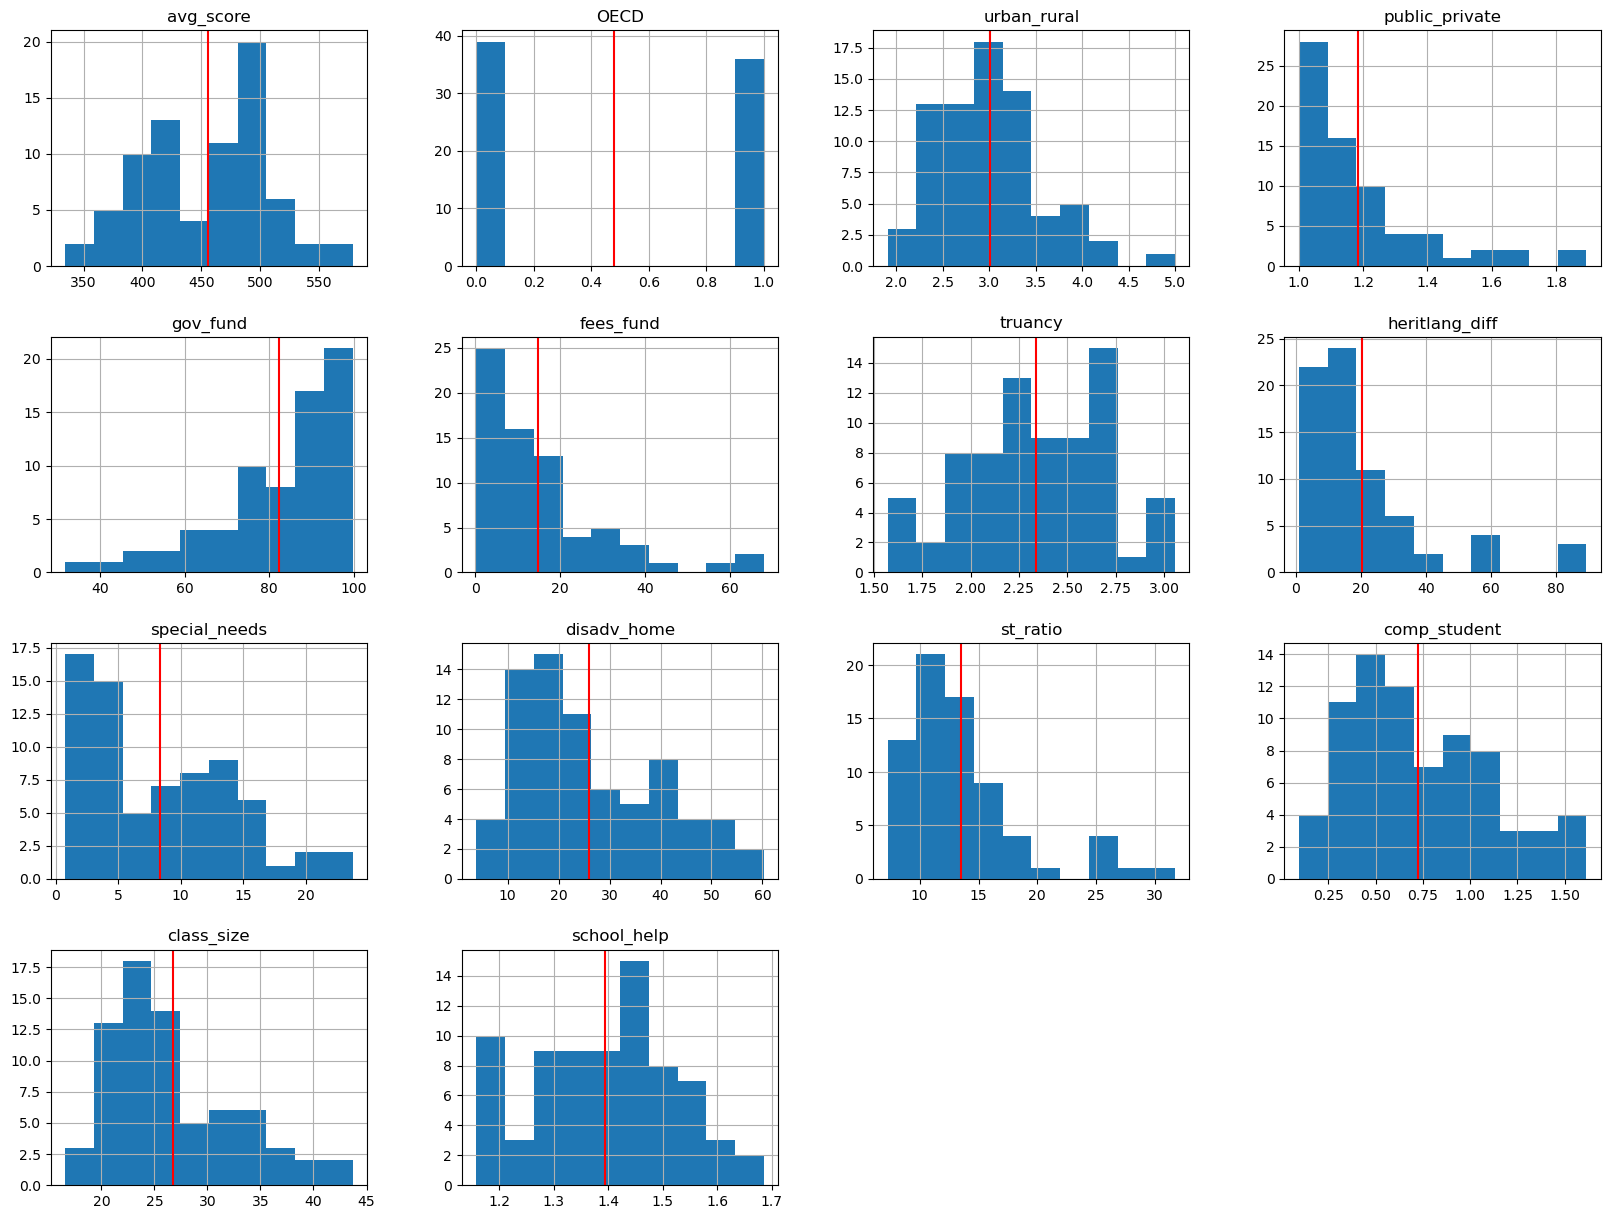

In [24]:
# plot the quantiative variables on histograms to explore them visually
axes = df_merged_mean.hist(figsize=(20, 15))

# loop through each subplot to plot its average
for ax in np.ravel(axes):
    # plot the mean for each variable
    title = ax.get_title()
    if title:
        var_mean = df_merged_mean[title].mean()
        ax.axvline(var_mean, color='red')

plt.show()


Looking at the dataset's histograms and descriptive statistics, we can already observe the following:

- The **average 2018 PISA country score is 455.8**. The score distribution does not have long tails on either end showing little variation and no outliers. It is roughly bimodal with a smaller peak between 400 and 425 and a second higher peak between 470 and 510.
- **Less than half of all countries are OECD members** (1 = member, 0 = not a member)
- **Most schools are in urban areas in towns with a population of up to 100 000 people,** but there is a small group of countries where schools are in large cities that is an outlier to this trend. (1 = A village, hamlet or rural area (fewer than 3 000 people), 2 = A small town (3 000 to about 15 000 people), 3 = A town (15 000 to about 100 000 people), 4 = A city (100 000 to about 1 000 000 people), 5 = A large city (with over 1 000 000 people).
- The **big majority of schools in all countries are public** (1 = public school, 2 = private school).
- The government funding distribution is skewed to the left and the fees funding is skewed to the right, showing that **school funding in most countries comes from government budgets (82%), and less from charging student fees (15%)**.
- **Truancy presents mostly very little hindrance to student learning**. No countries report a complete absence of truancy (=1). There are outliers around the third mark, meaning some countries experience truancy to some extent. (1 = Not at all, 2 = Very little, 3 = To some extent, 4 = A lot).
- In most countries, **on average 20% of students have a mother tongue different from the official language of instruction**. There are outliers, however, with some countries reporting a level as high as 90%.
- **In most countries, 8% of students have special needs on average**. The biggest number of countries report between 1% and 6%. It appears that no countries report 0. Some countries, however, have a level as high as 24%.
- On average, **25% of students come from socioeconomically disadvantaged homes**. Some countries/economies, however, have a level as high as 60%. There is a higher peak between 10%-20% and then a smaller one around 40%. 
- The **student-teacher ratio (the average number of 15/16-year-old students per teacher) is 13.5** for all countries spread between 7 and 32 students per teacher. There is a group of outlier countries with a considerably higher ratio of around 24-34 students per teacher.
- There are **0.7 computers per student** on average. There is considerable variation between countries, however, spread between 0 and 1.6 computers per student.
- The **average class size is 27 students**, spread between 17 students minimum and 44 students maximum.
- **Most schools provide some help to students with their studies and homework** (1 = Yes, 2 = No).


Based on the above, let's check the outliers we noticed in the variables above using bar charts.

### Outlier countries

Let's investigate the outlier countries to understand their divergent values.

In [25]:
# define a function to sort descending values and showing the top 5 countries to find out the countries/economies
# behind the outliers 

def sort_outliers(df, x):
    '''finds the top 5 outliers per variable'''
    df_sorted = df.sort_values(by=x, ascending=False).head(5)
    return df_sorted


In [26]:
# define a function to plot the outliers for visual exploration

def plot_outliers(df, x):
    '''plots the top 5 outliers per variable'''
    # create a new dataframe
    df_sorted = df.sort_values(by=x, ascending=False).head(5)
    # create a figure specifying the size and a single subplot
    fig, ax = plt.subplots()

    # create a bar chart to plot the outliers
    ax.bar(df_sorted['country'], df_sorted[x])
    ax.bar_label(ax.containers[0])

    # set the title and axis labels
    ax.set_title(f'Outliers by {x}')
    ax.set_xlabel('Country')
    ax.set_ylabel('Rate')
    
    # set the x-axis tick locations
    ax.set_xticks(range(len(df_sorted)))

    # rotate the x-axis labels
    ax.set_xticklabels(df_sorted['country'], rotation=45, ha='right')

    # show the plot
    return plt.show()


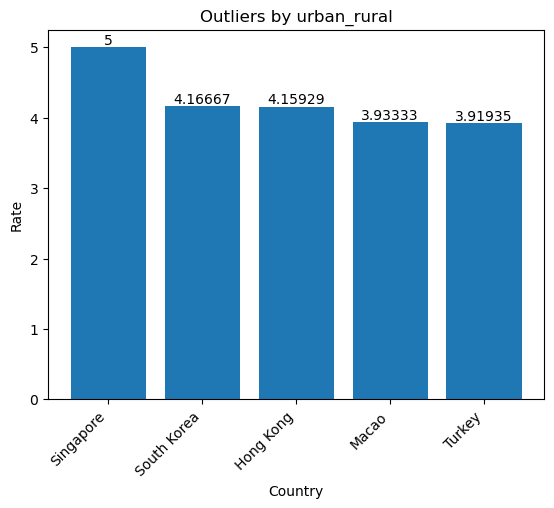

In [27]:
# plot outliers in urban school rates

plot_outliers(df_merged_mean, 'urban_rural')


We see that the biggest outlier is Singapore, which makes sense as it is a city-state with a population of over 5 million people, followed by populous countries with significant metropolitan areas. 

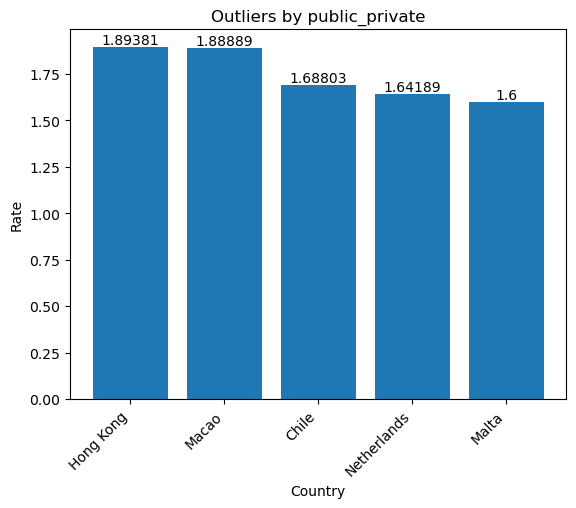

In [28]:
# plot outliers in private school rates

plot_outliers(df_merged_mean, 'public_private')


We see the top 5 countries where the share of private schools is the highest.

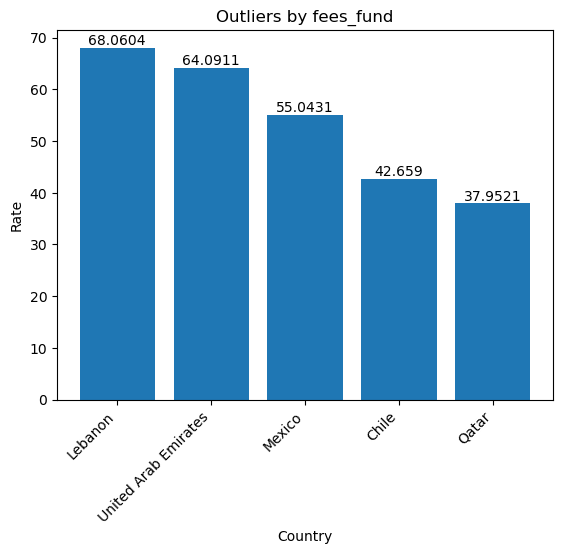

In [29]:
# plot outliers in % of school budget coming from student fees

plot_outliers (df_merged_mean, 'fees_fund')


The outliers in the fees-funded schools variable, are Lebanon, UAE and Mexico where over 50% of the schools budgets come from student fees. That means that there are considerable financial burden on parents to educate their children and a precondition for inequity.


Interestingly, when we look at the funding sources of the private school outliers, with the exception of Chile, they still receive most of their funding from the government. Hence, perhaps, the mismatch between the private school and the student fees funding outlier countries.  

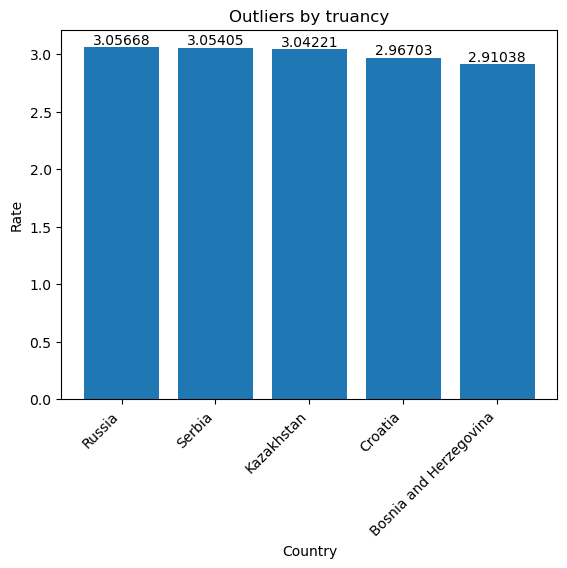

In [30]:
# plot the outliers in truancy rates

plot_outliers (df_merged_mean, 'truancy')


The countries reporting the highest truancy (albeit the rate is still 3 = to some extent) are  Eastern European/Central Asian former communist bloc countries. As the rates are very similar (can all be rounded to 3), let's see the next 5 countries in terms of the highest truancy rates.


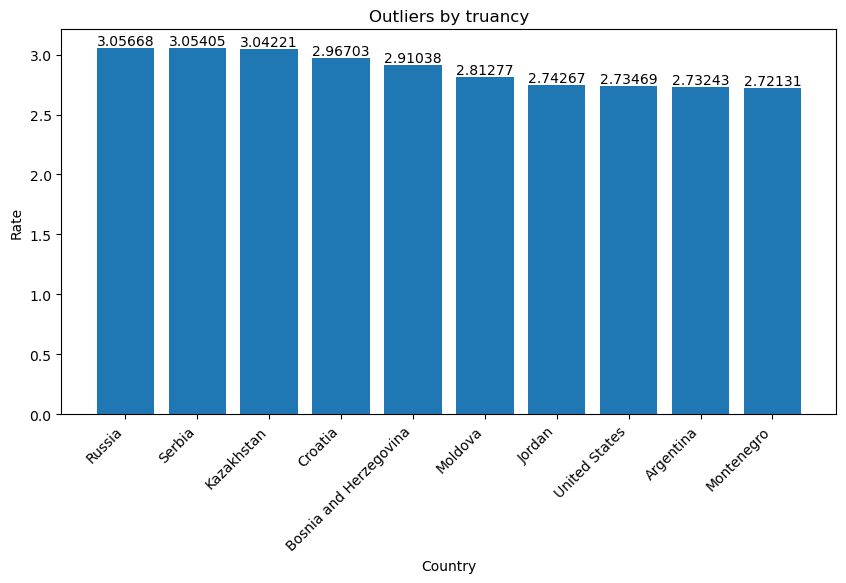

In [31]:
# create a new dataframe
df_sorted = df_merged_mean.sort_values(by='truancy', ascending=False).head(10)

# create a figure specifying the size and a single subplot
fig, ax = plt.subplots(figsize=(10, 5))

# create a bar chart to plot the outliers
ax.bar(df_sorted['country'], df_sorted['truancy'])
ax.bar_label(ax.containers[0])

# set the title and axis labels
ax.set_title(f'Outliers by truancy')
ax.set_xlabel('Country')
ax.set_ylabel('Rate')

# set the x-axis tick locations
ax.set_xticks(range(len(df_sorted)))

# rotate the x-axis labels
ax.set_xticklabels(df_sorted['country'], rotation=45, ha='right')

# show the plot
plt.show()


Two more Eastern European former communist countries appear in the 'top 10' in terms of truancy issues, as well as Jordan, the US and Argentina.

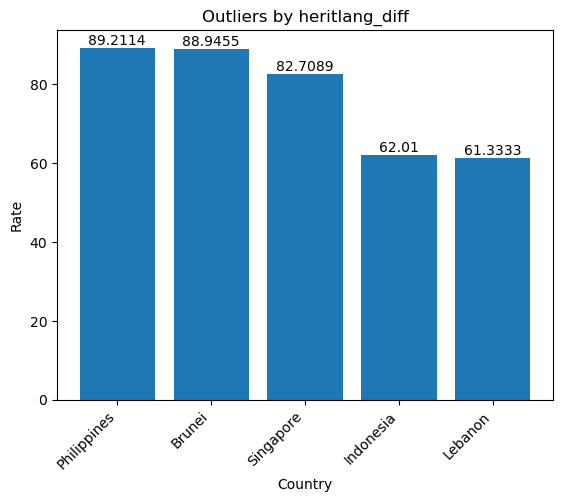

In [32]:
# plot the outliers in rates of students whose mother tongue differs from the language of instruction

plot_outliers (df_merged_mean, 'heritlang_diff')


The countries with the highest reported percentage of students whose mother tongue is different from the language of instruction at school are the Philippines, Brunei, Singapore, Indonesia and Lebanon. This makes sense as these are all multilingual societies.

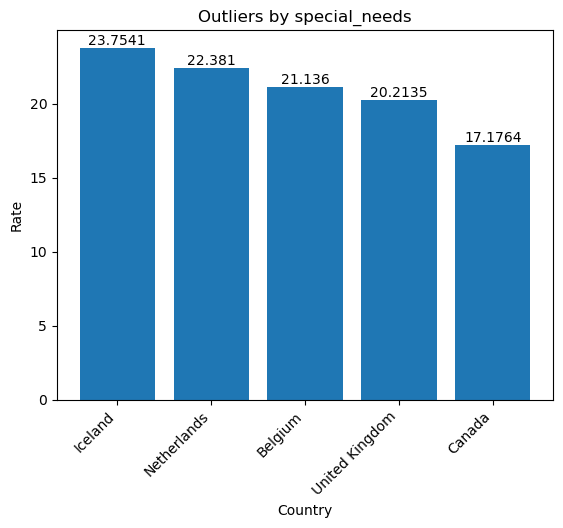

In [33]:
# plot the outliers in rates of students with special needs

plot_outliers (df_merged_mean, 'special_needs')


The countries with the highest rates of students with special needs in school are all rich Northern hemisphere countries that have the resources and policies to include students with different abilities in their education systems. 

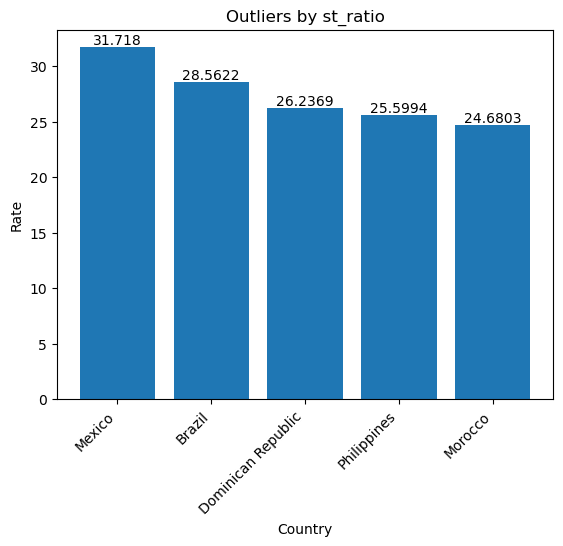

In [34]:
# plot the outliers in student-teacher ratio

plot_outliers (df_merged_mean, 'st_ratio')


The outliers in terms of student-teacher ratio are Mexico, Brazil, Dominican Republic, Philippines and Morocco with a significantly higher-than-average number of students per teacher.

## 4.2. Bivariate Exploration


> This section explores visually the bivariate relationships between the variables in the dataset to find how they are all correlated. It will: 
>* map the average PISA scores,
>* plot the bivariate relationships between the numeric variables,
>* explore the strong/moderate correlations between the numeric variables indicating education quality, and
>* investigate the relationship between OECD membership and average PISA score.

### 4.2.1. 2018 Average PISA Scores Map


In [35]:
# load the world shapefile

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [36]:
# check if the country names in the two dataframes are the same before merging

# create a list of country names in the world data frame
merged_country_names = list(world['name'])

# create a list of country names in the PISA scores data frame
original_country_names = list(df_merged_mean['country'])

# Find countries in the original data frame that are not in the merged data frame
missing_countries = [country for country in original_country_names if country not in merged_country_names]

# Print the list of missing countries
print(missing_countries)


['Bosnia and Herzegovina', 'Czech Republic', 'Dominican Republic', 'Hong Kong', 'Macao', 'Malta', 'Singapore', 'United States']


In [37]:
# align the names in the two dataframes

world['name'] = world['name'].replace({'Bosnia and Herz': 'Bosnia and Herzegovina', 'Czechia': 'Czech Republic', 'Dominican Rep.':'Dominican Republic', 'United States of America':'United States'})


In [38]:
# change the column 'name' in the world dataframe to 'country'

world.rename(columns={'name':'country'}, inplace=True)
world.head()


,pop_est,continent,country,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [39]:
# merge world map dataframe with the PISA scores dataframe

df_merged_map = world.merge(df_merged_mean, on='country', how = 'outer')
df_merged_map.head()

,pop_est,continent,country,iso_a3,gdp_md_est,geometry,avg_score,OECD,urban_rural,public_private,gov_fund,fees_fund,truancy,heritlang_diff,special_needs,disadv_home,st_ratio,comp_student,class_size,school_help
0,889953.0,Oceania,Fiji,FJI,5496.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,58005463.0,Africa,Tanzania,TZA,63177.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,603253.0,Africa,W. Sahara,ESH,907.0,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",516.7,1.0,3.048267,1.083127,88.968193,12.967153,2.659601,28.485477,17.176393,25.286676,NaN,1.230681,NaN,1.183792
4,328239523.0,North America,United States,USA,21433226.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",495.0,1.0,3.214765,1.067568,91.368794,9.277228,2.734694,18.869231,14.140845,44.909091,16.9869,1.440014,25.604167,1.183099


In [40]:
# save dataframe to csv

df_merged_map.to_csv('df_merged_map.csv', index=False)


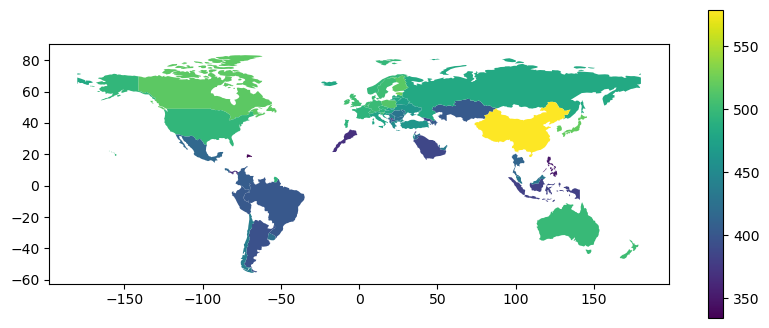

In [41]:
# plot the average PISA score on the map using the most color-blind friendly colormap - 'viridis'

fig, ax = plt.subplots(figsize=(10, 8))

df_merged_map.plot(column='avg_score', cmap='viridis', legend=True, legend_kwds={'shrink': 0.5}, ax=ax)

plt.show()

We see a **familiar North-South divide** (with the exception of highly developed Australia and New Zealand).

**China is an obvious outlier** as the country with the highest average PISA scores. It is worth mentioning, however, that the scores come from 4 of the wealthiest Chinese provinces (Beijing, Shanghai, Jiangsu and Zhejiang) out of mainland China’s total 32 provinces. It is **doubtful that they are representative of the country as a whole.**

China is followed by the countries in the North-Western part of the globe and South-East Asia. They are followed by the US, Australia and New Zealand, then Russia, Eastern Europe and Turkey. The countries with the lowest average PISA score tend to be in the Southern hemisphere, North Africa and Central Asia. 

The countries that did not participate in the 2018 PISA assessment do not appear on the map.

### 4.2.2. Preliminary exploration of bivariate relationships between numeric variables


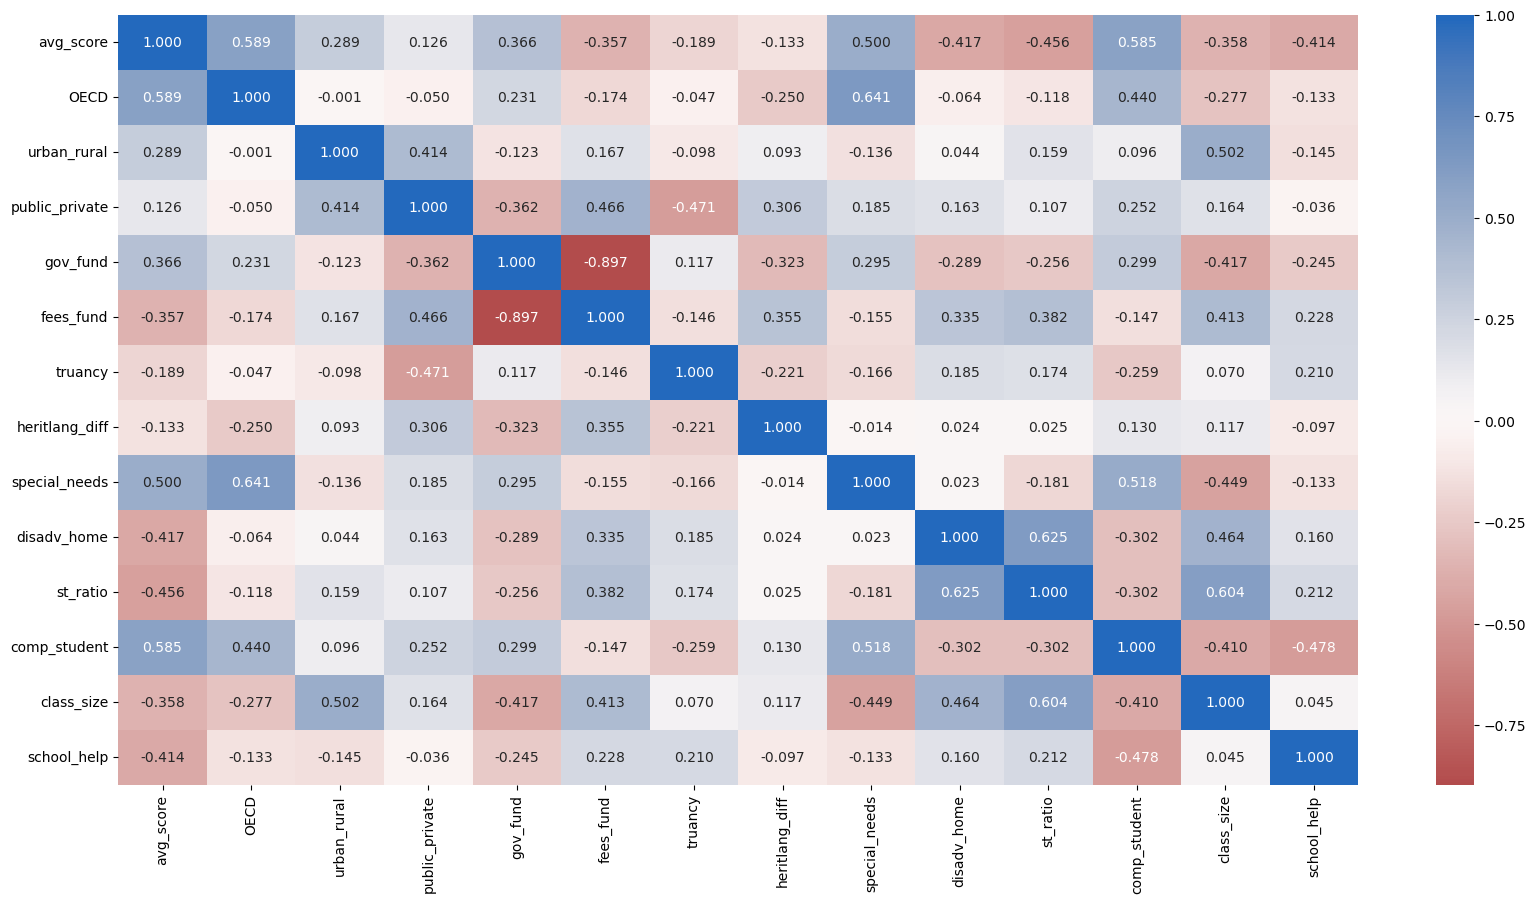

In [42]:
# linear correlation plot between numeric variables

plt.figure(figsize = [20, 10])
sns.heatmap(df_merged_mean.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()


There are **few strong linear correlations between the variables**. I would have expected to see more strong-to-moderate correlations.

We can assume that **correlations between these variables vary depending on the country and region**, but for the pruposes of this project, we'll only focus on the global overview and on linear relationships.

>Let's look at the relationships ordered by correlation strength to see them more clearly and to choose the relationships worth looking into further.

In [43]:
# create a correlation matrix
corr_matrix = df_merged_mean.corr()

# sort correlations by strength
corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(ascending=False)

# remove correlation pairs between variables and themselves
sorted_pairs = sorted_pairs[sorted_pairs.index.get_level_values(0) != sorted_pairs.index.get_level_values(1)]

# remove duplicate correlation pairs
sorted_pairs = sorted_pairs[sorted_pairs.duplicated(keep="first") == False] 

#show top 10 strongest positive correlations
print('\nTop 10 strongest positive correlations:\n\n', sorted_pairs.head(10),'\n')

#show top 10 strongest negative correlations
print('Top 10 strongest negative correlations:\n\n', sorted_pairs.tail(10))


Top 10 strongest positive correlations:

 OECD            special_needs    0.641365
st_ratio        disadv_home      0.625471
                class_size       0.603933
OECD            avg_score        0.589056
comp_student    avg_score        0.584974
special_needs   comp_student     0.518308
class_size      urban_rural      0.501527
avg_score       special_needs    0.500495
public_private  fees_fund        0.466337
class_size      disadv_home      0.463775
dtype: float64 

Top 10 strongest negative correlations:

 gov_fund        public_private   -0.362172
comp_student    class_size       -0.409538
avg_score       school_help      -0.413843
disadv_home     avg_score        -0.416835
class_size      gov_fund         -0.417290
                special_needs    -0.448601
avg_score       st_ratio         -0.456067
public_private  truancy          -0.470537
school_help     comp_student     -0.477791
fees_fund       gov_fund         -0.897092
dtype: float64


The **strongest associations** (with correlation coefficients of 0.6 and above) are:

positive:
- OECD and % of students with special needs,
- student-teacher ratio and students coming from disadvantaged homes,
- student-teacher ratio and class size,

negative:
- fees funding and government funding - this is the strongest correlation by far and it is a negative one, meaning when one of the variables rises, the other one falls.

The **moderate associations** (with correlation coefficients between 0.4 and 0.59) are:

positive:
- average score and OECD membership,
- average score and number of computers per student,
- average score and % of students with special needs,
- number of computers per student and % of students with special needs,
- class size and urban/rural school location,
- class size and number of students from disadvantaged homes,
- private school ownership and school funding coming from student fees.

negative:
- average score and student-teacher ratio,
- average score and availability of school help,
- average score and students coming from disadvantaged homes,
- class size and school public funding,
- class size and % of students with special needs,
- class size and number of computers per student,
- number of computers per student and availability of school help,
- truancy and private school ownership.

Let's visualize these correlations to see them better.



>All variables have moderate to strong associations with at least one other variable in the dataset apart from number of students whose mother tongue differs from the official language of instruction. Therefore, we will not investigate it any further. 

>I will also not investigate the association between private school ownership and school funding coming from student fees, as it appears rather self-evident and doesn't involve any variables of education quality.


### 4.2.3. Strong/Moderate Correlations between Education Quality Variables

#### Strong/Moderate Correlations with Average PISA Score 


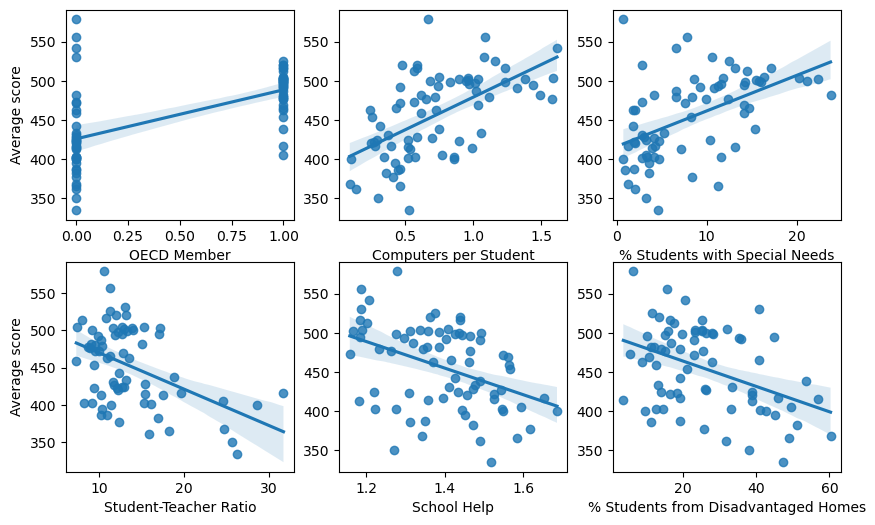

In [44]:
# create a figure with six subplots for the six correlations of average PISA score

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# plot the correlations between the variables

sns.regplot(x='OECD', y='avg_score', data=df_merged_mean, ax=axs[0, 0])
axs[0, 0].set_xlabel('OECD Member')
axs[0, 0].set_ylabel('Average score')

sns.regplot(x='comp_student', y='avg_score', data=df_merged_mean, ax=axs[0, 1])
axs[0, 1].set_xlabel('Computers per Student')
axs[0, 1].set_ylabel('')

sns.regplot(x='special_needs', y='avg_score', data=df_merged_mean, ax=axs[0, 2])
axs[0, 2].set_xlabel('% Students with Special Needs')
axs[0, 2].set_ylabel('')

sns.regplot(x='st_ratio', y='avg_score', data=df_merged_mean, ax=axs[1, 0])
axs[1, 0].set_xlabel('Student-Teacher Ratio')
axs[1, 0].set_ylabel('Average score')

sns.regplot(x='school_help', y='avg_score', data=df_merged_mean, ax=axs[1, 1])
axs[1, 1].set_xlabel('School Help')
axs[1, 1].set_ylabel('')

sns.regplot(x='disadv_home', y='avg_score', data=df_merged_mean, ax=axs[1, 2])
axs[1, 2].set_xlabel('% Students from Disadvantaged Homes')
axs[1, 2].set_ylabel('')

plt.show()

**OECD membership, more computers and more students with special needs** included in the education system tend to be linked with **higher PISA scores**.

On the contrary, **the higher the number of students per teacher, the number of disadvantaged students, and the more school help**, the **lower the average PISA scores**.


#### Strong/Moderate Correlations with Student-Teacher Ratio


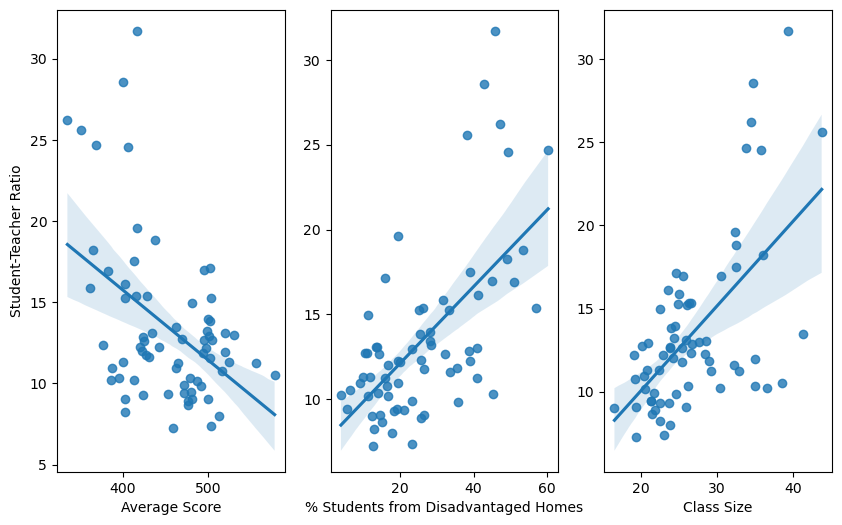

In [45]:
# create a figure with six subplots for the six associations of student-teacher ratio

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))

# plot the associations between the four variables

sns.regplot(x='avg_score', y='st_ratio', data=df_merged_mean, ax=axs[0])
axs[0].set_xlabel('Average Score')
axs[0].set_ylabel('Student-Teacher Ratio')

sns.regplot(x='disadv_home', y='st_ratio', data=df_merged_mean, ax=axs[1])
axs[1].set_xlabel('% Students from Disadvantaged Homes')
axs[1].set_ylabel('')

sns.regplot(x='class_size', y='st_ratio', data=df_merged_mean, ax=axs[2])
axs[2].set_xlabel('Class Size')
axs[2].set_ylabel('')

plt.show()


The **number of students per teacher rises, as the average score drops.**

On the contrary, **the number of students per teacher rises with the increased number of students from disadvanatged homes and increased class size**. This is an important relationship that can act as a metric for education inequity when looking at the education systems in individual countries.

These correlations confirm [studies](https://www.chalkbeat.org/2022/6/10/23162544/class-size-research) (albeit not always conclusive) showing that **students in smaller classes tend to have higher test scores**, as well as the **worse learning conditions disadvantaged students tend to experience (larger class sizes with fewer teachers per student)**.

#### Strong/Moderate Correlations with Class Size

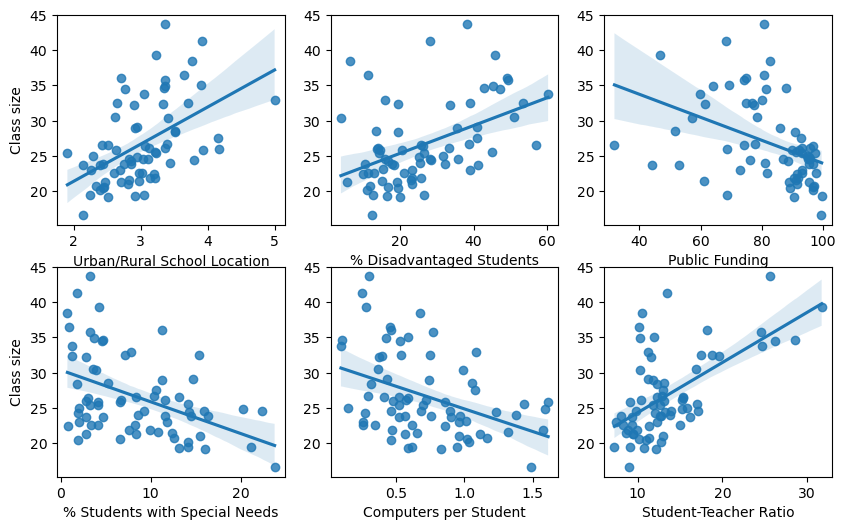

In [46]:
# create a figure with six subplots for the six associations of class size

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# plot the associations between the seven variables

sns.regplot(x='urban_rural', y='class_size', data=df_merged_mean, ax=axs[0, 0])
axs[0, 0].set_xlabel('Urban/Rural School Location')
axs[0, 0].set_ylabel('Class size')

sns.regplot(x='disadv_home', y='class_size', data=df_merged_mean, ax=axs[0, 1])
axs[0, 1].set_xlabel('% Disadvantaged Students')
axs[0, 1].set_ylabel('')

sns.regplot(x='gov_fund', y='class_size', data=df_merged_mean, ax=axs[0, 2])
axs[0, 2].set_xlabel('Public Funding')
axs[0, 2].set_ylabel('')

sns.regplot(x='special_needs', y='class_size', data=df_merged_mean, ax=axs[1, 0])
axs[1, 0].set_xlabel('% Students with Special Needs')
axs[1, 0].set_ylabel('Class size')

sns.regplot(x='comp_student', y='class_size', data=df_merged_mean, ax=axs[1, 1])
axs[1, 1].set_xlabel('Computers per Student')
axs[1, 1].set_ylabel('')

sns.regplot(x='st_ratio', y='class_size', data=df_merged_mean, ax=axs[1, 2])
axs[1, 2].set_xlabel('Student-Teacher Ratio')
axs[1, 2].set_ylabel('')

plt.show()


Continuing with the topic of **class size, we see that it tends to increase**: 
- in urban schools, possibly reflecting the smaller population size in rural areas and smaller towns;
- in schools with higher number of students from disadvantaged homes;
- with an increasing student-teacher ratio (as we already saw above).

**Class sizes tend to decrease**:
- in schools with higher level of public funding;
- as the number of students with special needs increases;
- as the number of computers per student increases.

Once again, these results speak of **education inequity where disadvantaged students tend to study in larger classes (with higher student-teacher ratio)**. On the contrary, we also observe that **schools with a higher number of students with special needs tend to have smaller class sizes to respond to students' individual needs**, which is possibly benefits all students in the class.


#### Strong/Moderate Correlations with Number of Computers per Student 

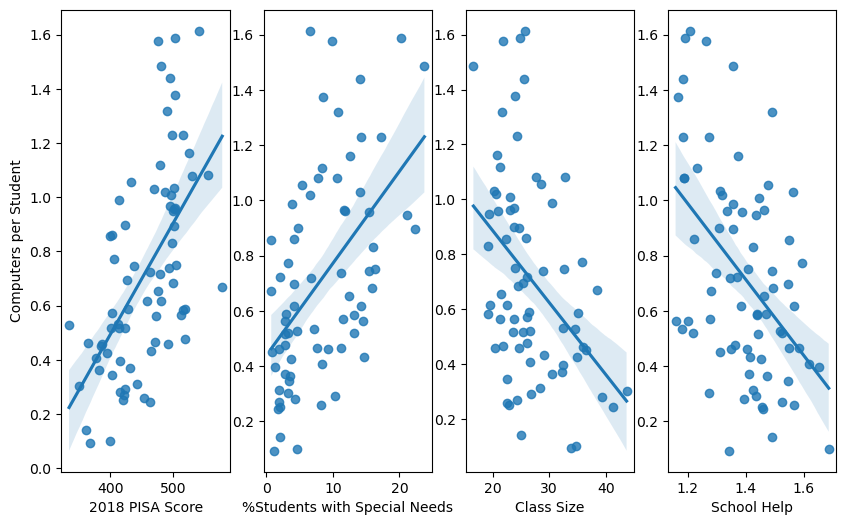

In [47]:
# create a figure with six subplots for the four associations of number of computers per student

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 6))

# plot the associations between the five variables

sns.regplot(x='avg_score', y='comp_student', data=df_merged_mean, ax=axs[0])
axs[0].set_xlabel('2018 PISA Score')
axs[0].set_ylabel('Computers per Student')

sns.regplot(x='special_needs', y='comp_student', data=df_merged_mean, ax=axs[1])
axs[1].set_xlabel('%Students with Special Needs')
axs[1].set_ylabel('')

sns.regplot(x='class_size', y='comp_student', data=df_merged_mean, ax=axs[2])
axs[2].set_xlabel('Class Size')
axs[2].set_ylabel('')

sns.regplot(x='school_help', y='comp_student', data=df_merged_mean, ax=axs[3])
axs[3].set_xlabel('School Help')
axs[3].set_ylabel('')

plt.show()


The **number of computers per student tends to be higher**:
- in countries with higher PISA scores, and
- in countries with more students with special needs in schools.

The **number of computers per student tends to decrease**:
- as class sizes increase, and
- as school help increases.

It appears that there is an important **association between computers per student, average PISA score and number of students with special needs - all indicating higher education system quality**.

It is understandable that **systems with larger class sizes and fewer computers per student are correlated as they may both indicate less investment in education**. 

The **negative correlation between computers per student and school help, however, is surprising**. I would have expected school help to be positively correlated with variables indicating education quality. Perhaps it is rather associated with schools with fewer resources where students may need more help at school. Nevertheless, this is unclear, as student help has a very weak correlation with the number of students from disadvantaged homes. It is worth investigating this further using the original three school help variables, but for now I will not look into it further in this project.


#### Correlation between truancy and private schools 

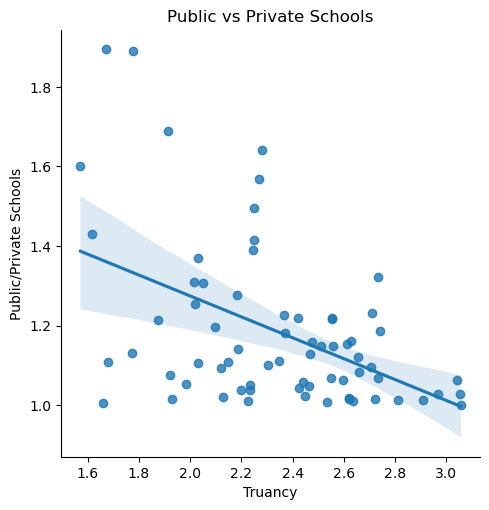

In [48]:
# create lmplot with two variables
sns.lmplot(x='truancy', y='public_private', data=df_merged_mean)

# set the axis labels and title
plt.xlabel('Truancy')
plt.ylabel('Public/Private Schools')
plt.title('Public vs Private Schools')

plt.show()


**Truancy appears to be a bigger issue in public schools than in private schools**. Given the fact that the large majority of schools in the dataset are public, and the different private school set-ups (as we saw in the school funding sources), it is worth looking at this relationship at the individual country level.

### 4.2.4. Relationship between OECD Membership and Average PISA Score


We have already seen that OECD member countries tend to have higher average PISA scores. Let's visualize this relationship to understand it better.

In [49]:
# create two dataframes - one for OECD member countries and one for non-member countries

df_OECD_member = df_merged_mean.loc[df_merged_mean['OECD'] == 1]
df_OECD_nonmember = df_merged_mean.loc[df_merged_mean['OECD'] == 0]


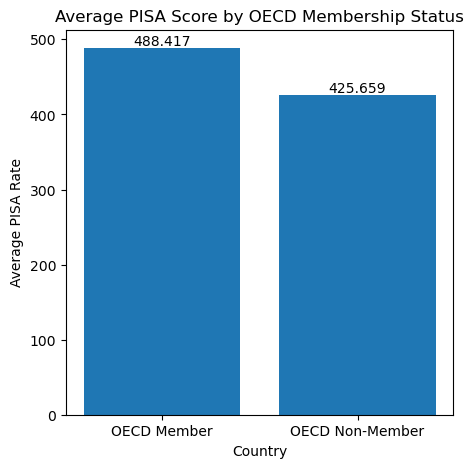

In [50]:
# plot the distribution of scores among OECD and non-OECD member countries in a bar chart

# calculate the mean score for member and non-member countries
OECD_member_mean = df_OECD_member['avg_score'].mean()
OECD_nonmember_mean = df_OECD_nonmember['avg_score'].mean()

# create a figure specifying the size and a signle subplot
fig, ax = plt.subplots(figsize=(5, 5))

# create the bar chart
ax.bar(['OECD Member', 'OECD Non-Member'], [OECD_member_mean, OECD_nonmember_mean])

# add the values of each bar
ax.bar_label(ax.containers[0])

# add labels and title
ax.set_title('Average PISA Score by OECD Membership Status')
ax.set_xlabel('Country')
ax.set_ylabel('Average PISA Rate')

# show the plot
plt.show()


As the majority of OECD members are developed countries with high-income economies, it is not suprising that their scores are on average higher than those of non-OECD member countries. To understand the distribution of scores among OECD and non-OECD member countries better, let's plot it on a histogram.

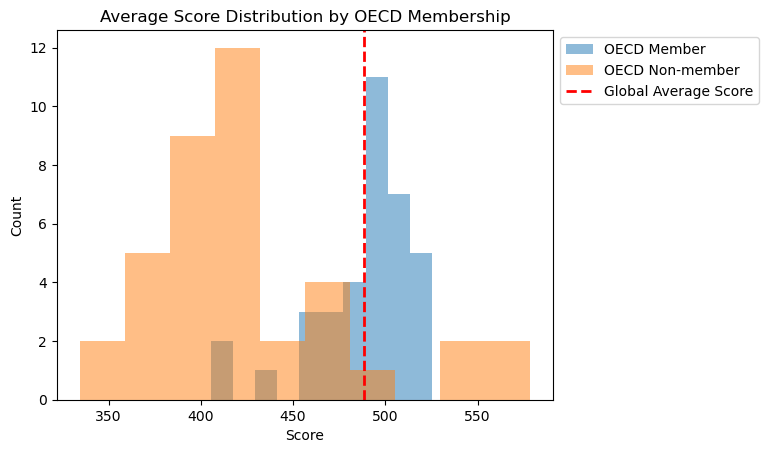

In [51]:
# find the global average for all countries/economies in the dataset
avg_score = np.mean(df_OECD_member['avg_score'])

# plot a histogram for member countries/economies
plt.hist(df_OECD_member['avg_score'], bins=10, alpha=0.5, label='OECD Member')

# alot a histogram for non-member countries/economies
plt.hist(df_OECD_nonmember['avg_score'], bins=10, alpha=0.5, label='OECD Non-member')

# add a line to indicate the global average
plt.axvline(avg_score, color='red', linestyle='dashed', linewidth=2, label='Global Average Score')

# Add labels and legend
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Average Score Distribution by OECD Membership')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# show the plot
plt.show()


The histogram distribution shows that **although the average score for OECD countries is higher than that for non-members, non-OECD countries have reached higher maximum scores**. This reflects the fact that 5 of the 10 countries with the highest scores are non-members. 

Nevertheless, **unlike non-member countries, the majority of OECD members are above the global average**. There are a few outliers, though, with scores between 400 and 450. It may be interesting to see which these countries are.

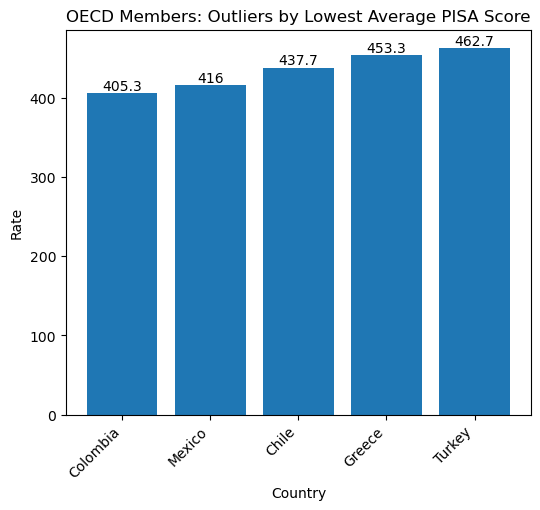

In [52]:
# find the OECD member outlier countries/economies with the lowest scores

# create a new dataframe
df_outliers = df_OECD_member.sort_values(by='avg_score').head()

# create a figure specifying the size and a single subplot
fig, ax = plt.subplots(figsize=(6, 5))

# create a bar chart to plot the outliers
ax.bar(df_outliers['country'], df_outliers['avg_score'])
ax.bar_label(ax.containers[0])

# set the title and axis labels
ax.set_title('OECD Members: Outliers by Lowest Average PISA Score')
ax.set_xlabel('Country')
ax.set_ylabel('Rate')

# set the x-axis tick locations
ax.set_xticks(range(len(df_outliers)))

# rotate the x-axis labels
ax.set_xticklabels(df_outliers['country'], rotation=45, ha='right')

# show the plot
plt.show()


The three OECD member countries with the lowest scores are all in Latin America (Colombia, Mexico and Chile), followed by neighboring Greece and Turkey in Southern Europe/Asia.

It will also be interesting to see which are the outliers among the non-member countries. Let's plot them on another bar chart.

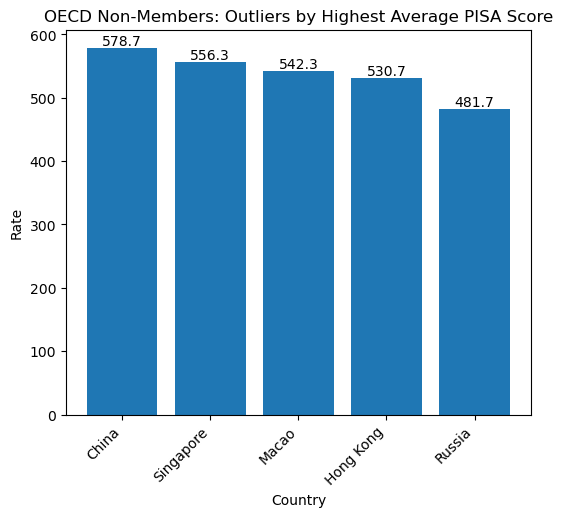

In [53]:
# find the OECD non-member outlier countries/economies with the highest scores

# create a new dataframe
df_outliers = df_OECD_nonmember.sort_values(by='avg_score', ascending=False).head()

# create a figure specifying the size and a single subplot
fig, ax = plt.subplots(figsize=(6, 5))

# create a bar chart to plot the outliers
ax.bar(df_outliers['country'], df_outliers['avg_score'])
ax.bar_label(ax.containers[0])

# set the title and axis labels
ax.set_title('OECD Non-Members: Outliers by Highest Average PISA Score')
ax.set_xlabel('Country')
ax.set_ylabel('Rate')

# set the x-axis tick locations
ax.set_xticks(range(len(df_outliers)))

# rotate the x-axis labels
ax.set_xticklabels(df_outliers['country'], rotation=45, ha='right')

# show the plot
plt.show()


The outlier countries are all (mostly) in Asia: Singapore and the three neighbours China, Macao and Hong-Kong. Russia is particular case, as most of its territory lies in Asia, it is also a European country.

There seems to be a relationship between OECD membership and average PISA scores - likely due to the fact that most members are wealthy highly developed economies.

## 4.3. Multivariate Exploration

>Following on from the bivariate exploration, this section will look at the correlations between the two variables that we found had the strongest correlation with OECD - average PISA score and number of students with special needs - by OECD membership. This way, we can see what effect membership has on their relationships with other variables. For the latter, let's choose again the strongest correlations:
>- average PISA score with: number of computers per student, student-teacher ratio, disadvantaged students, and school help;
>- number of students with special needs with: average PISA score and class size.

In [54]:
# define a function to visualize the multivariate relationships on scatterplots

def scatterplot_multi(var1, var2, label_dict=None):
    '''plots the relationship between average score and another variable on a scatterplot'''

    # create lmplot with two variables
    sns.lmplot(x=var1, y=var2, data=df_merged_mean, hue='OECD', markers=['o', '^'])

    # set the axis labels and title using the label_dict dictionary
    plt.xlabel(label_dict[var1])
    plt.ylabel(label_dict[var2])
    plt.title(f'{label_dict[var1]} vs {label_dict[var2]} by OECD Membership')

    # show the plot
    return plt.show()


#### 4.3.1.  Average PISA Score: Strongest Correlations by OECD Membership

>As a reminder, the average PISA score has the strongest correlations with:
>- number of computers per student,
>- student-teacher ratio,
>- school help, and
>- students from disadvanatged homes.

> We'll explore these below by OECD membership.

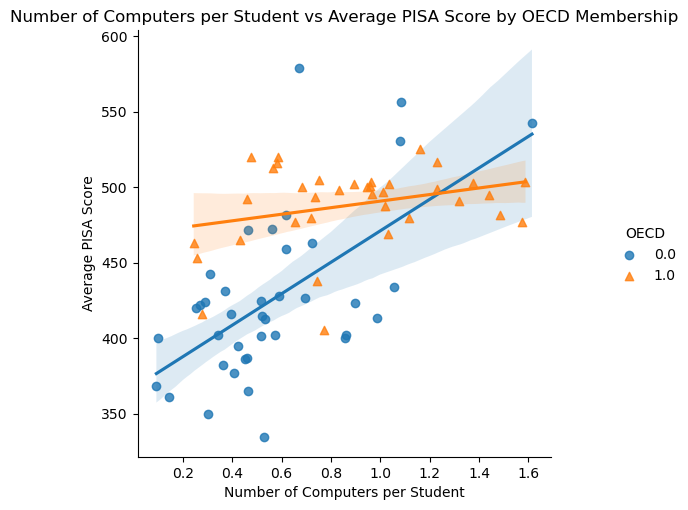

In [55]:
# visualize the relationship between the number of computers per student and the average PISA score by OECD 
# membership

label_dict = {
            'comp_student': 'Number of Computers per Student',
            'avg_score': 'Average PISA Score'
        }

scatterplot_multi ('comp_student', 'avg_score', label_dict)


The **correlation between the number of computers per student and score is positive for both OECD and non-OECD countries**, but it is stronger for the latter (or every unit increase in the number of computers per student, there is a greater increase in the average score).

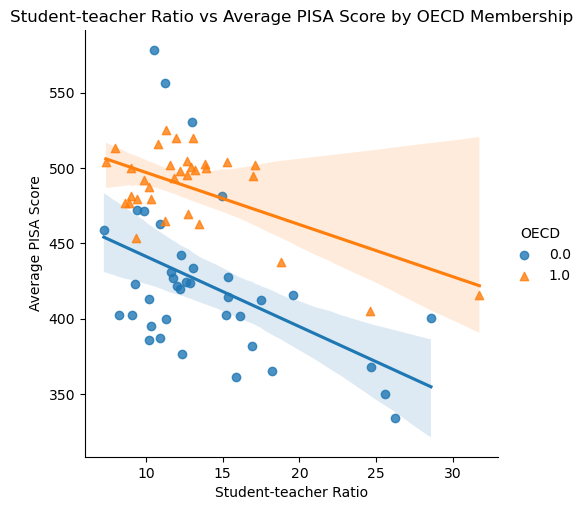

In [56]:
# plot the relationship between student-teacher ratio and PISA score by OECD membership

label_dict = {
            'st_ratio': 'Student-teacher Ratio',
            'avg_score': 'Average PISA Score'
        }

scatterplot_multi ('st_ratio', 'avg_score', label_dict)


The average **PISA scores decrease as the student-teacher ratio increases for both OECD members and non-members**, suggesting that student-teacher ratio tends to be a strong universal indicator of education quality.

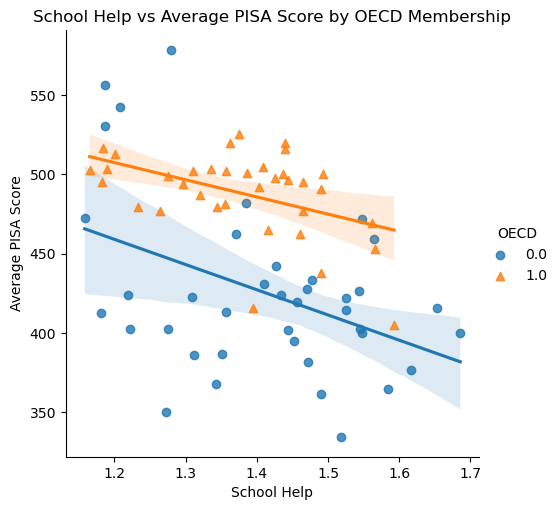

In [57]:
# plot the relationship between average PISA score and school help by OECD membership 

label_dict = {
            'school_help': 'School Help',
            'avg_score': 'Average PISA Score'
        }

scatterplot_multi ('school_help', 'avg_score', label_dict)



Once again, we see the **surprising negative correlation between PISA scores and school help that merits further investigation - the more school help, the lower the PISA score**. The trend is the same **in both OECD members and non-members**. 

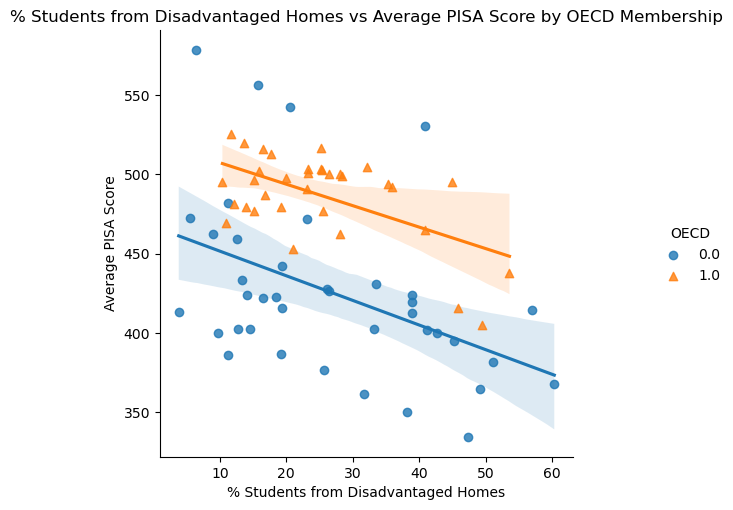

In [58]:
# plot the relationship between number of students from disadvantaged homes and PISA score by OECD membership 

label_dict = {
            'disadv_home': '% Students from Disadvantaged Homes',
            'avg_score': 'Average PISA Score'
        }

scatterplot_multi ('disadv_home', 'avg_score', label_dict)


Again we see a picture of global education inequity with **average PISA scores dropping as the number of disadvantaged students increases in both OECD member and non-member countries**.

#### 4.3.2. Students with Special Needs: Strongest Correlations by OECD Membership


> As a reminder, the number of students with special needs has the strongest correlations with:
>- average PISA score, and
>- class size.

>Again, we'll explore these below by OECD membership.

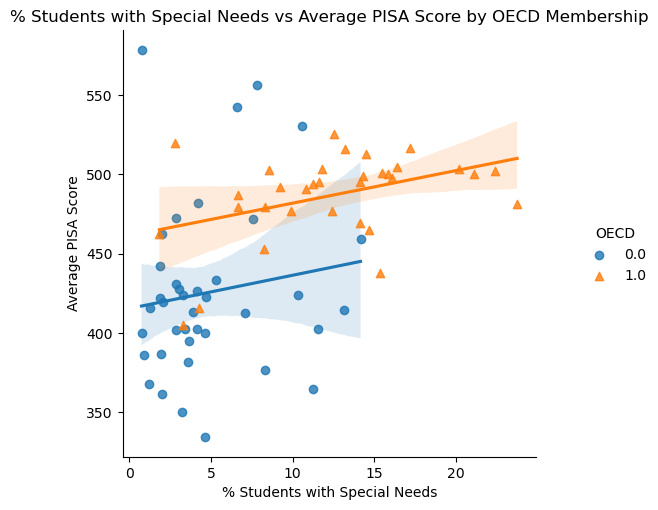

In [59]:
# plot the relationship between number of students with special needs and PISA score by 
# OECD membership

label_dict = {
            'special_needs': '% Students with Special Needs',
            'avg_score': 'Average PISA Score'
        }

scatterplot_multi ('special_needs', 'avg_score', label_dict)

The number of students with special needs is positively correlated with average PISA scores **in both member and non-member countries: the higher the number of students with special needs, the higher the average PISA score**. We also see that non-members have included students with special needs in their education systems to a much lesser extent.

This is an interesting correlation. It may be used as an argument for investing in education inclusive of students with special needs, as it benefits all students and learning outcomes. It may also speak of higher levels of investment in education that is the underlying factor beneath both the inclusion of students with special needs and student performance.


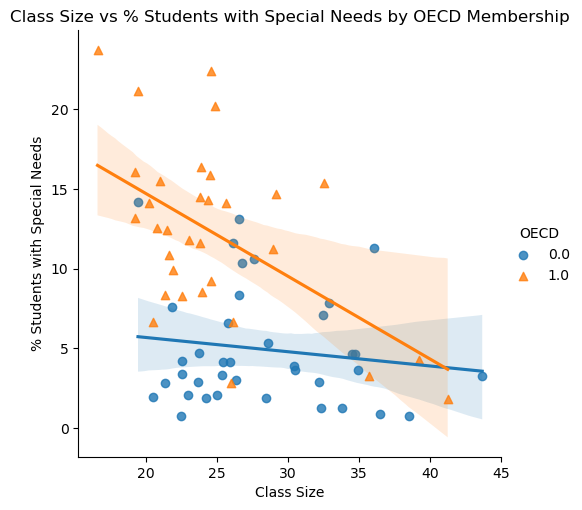

In [60]:
# plot the relationship between number of students with special needs and PISA score by 
# OECD membership

label_dict = {
            'class_size': 'Class Size',
             'special_needs': '% Students with Special Needs'
        }

scatterplot_multi ('class_size', 'special_needs', label_dict)

The number of students with special needs is negatively correlated with class size: **the larger the class size, the fewer the number of students with special needs in school**. This correlation is **significantly stronger for OECD member countries** as shown by the steep line.

## 5. Conclusions

The dataset's visual exploration has provided important insights into our research questions.

- **Which education system/school characteristics had the strongest correlation with average 2018 PISA score?**

>The average PISA scores have the strongest positive correlations with access to computers, smaller student-teacher ratio and inclusion of students with special needs. In other words, **students education systems providing good access to computers, have more teachers per student and have included students with special needs achieve higher test scores**. These variables can thus be viewed as indicators of education quality. 

>On the contrary, the scores are negatively correlated with the **number of students from disadvantaged homes who the data show tend to study in schools with fewer teachers per student (student-teacher ratio), in larger classes and with fewer computers at their disposal**. This is another reminder of education inquities persisting around the world.

- **What were the effects of OECD membership on 2018 PISA performance?**

>**Inequities between countries are also visible when comparing the scores and other indicators of education quality between OECD member and non-member countries.** OECD members tend to have higher average PISA scores, smaller class sizes, fewer disadvantaged students, and more students with special needs included in their education systems. As the OECD is an organization of wealthy developed countries, this appears to be reflected in the data on education outcomes. 

**Other considerations:**
- The correlations found in this study are on a global level including all countries that participated in the 2018 PISA school survey. It is important to keep in mind that **the strength and direction of these correlations may change when looking at individual countries or regions**.
- It is also worth remembering that these **data were collected in 2018 before the coronavirus pandemic affected education systems globally**. The **next PISA assessment is due to take place this year (2023)** and we can expect to see the pandemic's effect in the results.